<center>
    <img src="https://weclouddata.s3.amazonaws.com/images/logos/wcd_logo_new_2.png" width='30%'> 
</center>

----------

<h1 align="center"> Client Project Skills Assessment - Test3 </h1>
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>Vivian Kuang </font></center>
<br>

----------

## Test 3 - Machine Learning
### 1.  Data Description
A mega-online shopping mall provides different baby brands to customers. In order to optimize online advertisements throughout websites, they want to predict the view-to-click probability given the information below.

The data consists of:

- Action: the “interaction” that users completed when online ad was exposed. There are two types of actions in this dataset, View (a.k.a Impression) or Click. (Reference: https://en.wikipedia.org/wiki/Impression_(online_media))
- ID: unique user IDs
- Action Time: the time when action (View/Click) happened, in microseconds format
- Website: the website where the ad was published
- Banner Size: the banner size of ad
- Brand: the brand name that the ad was promoting
- Colour: the colour of product showcased in the ad
- Interaction Time: user’s interaction time with each ad (sec)


### 2. Tasks

### Goal: Predict the Likelihood of Click

#### What we would like to see in your Jupyter Notebook:

- EDA Process (univariate/multivariate analysis, filling missing data etc.)
- Feature Selection (select existing features and explanation)
- Feature Engineering (create new features and explanation)
- Select and Create Model
- Hyper parameter Tuning if you feel it’s needed
- Model Validation process
- Model Interpretation


###  3. Output
Bonus Points

- You will get additional points if you use ML pipelines, create feature engineering functions, and write custom transformers.
- Keep in mind that you may have limited time on all 3 tests. So use your time wisely.


## Data Analysis and Modeling

### Importing libs

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline as Pipe # distinguish from imblearn pipeline
from imblearn.pipeline import Pipeline

# feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFE

# model interpretablity
import eli5
from eli5.sklearn import PermutationImportance
from lime.lime_tabular import LimeTabularExplainer
import shap

# algos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, RepeatedEditedNearestNeighbours
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin #inheritance class for custom transformers

# metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# saving the pipeline
import joblib

import warnings
warnings.filterwarnings('ignore')

### Get data

- Read the dataset into pandas
    - Try to figure out 
    - Set the column names


In [3]:
# File paths for the CSV files
file_paths = ['test3_data.csv'] #, 'Test_Data_C_2014_07_30.csv', 'Test_Data_C_2014_08_30.csv']

# Initialize an empty list to store DataFrames from each file
dfs = []

# Read each CSV file into a DataFrame and append it to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

In [4]:
df

Unnamed: 0                            ID        ActionTime Action  \
0                1  AMsySZbNg8SBwPtj7IGHnip_8aY0  1508761859495365   View   
1                2  AMsySZZcUFNGOJs-lfC9j-ZDlV7Z  1502847469736117   View   
2                3  AMsySZYoK8_bD0hGv4zu0iRn1TFo  1514169431528120   View   
3                4  AMsySZahxpwLOWnMJj6RGATgwEOc  1515527952591896   View   
4                5  AMsySZbqgfMBDtAqZz1jVRaOmX00  1507514809374045   View   
...            ...                           ...               ...    ...   
999995      999996  AMsySZY-9Mzh_xjk57_PBNO_8QRO  1508108130372165   View   
999996      999997  AMsySZY-KoDAx1qJv15SZ9lKO2QF  1516760241253562   View   
999997      999998  AMsySZZGRYHeXVjPP2Rr6F-kjFc3  1502841951670170   View   
999998      999999  AMsySZaSAhXiCSGhaCLWcoLse-0i  1517068511614322   View   
999999     1000000  AMsySZYRh7zkkDPtcrGdXEbM_M0f  1505855363538153   View   

              Website BannerSize     Brand  colour  InteractionTime  
0            Facebook    300x600  Carter's    Pink         0.171601  
1            Facebook    300x250  Burberry     Red         4.303945  
2            Facebook     728x90    Disney  Yellow         0.868106  
3            Facebook     320x50  Carter's  Yellow         0.802647  
4       instagram.com    300x250       Gap    Gold         0.627148  
...               ...        ...       ...     ...              ...  
999995  instagram.com    300x250  Old Navy  Yellow         0.049011  
999996        Twitter    320x480  JoeFresh  Yellow         0.059118  
999997          Other    300x250  JoeFresh    Pink         0.025754  
999998       Facebook    300x250  Old Navy    Pink         0.453710  
999999         Amazon      Other  Old Navy    Pink         2.411266  

[1000000 rows x 9 columns]

### Explore and Visualize the data

- Get a general picture of the datasets: training and testing
- Analyze the numeric and category features
- Visualize the different features 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1000000 non-null  int64  
 1   ID               1000000 non-null  object 
 2   ActionTime       1000000 non-null  int64  
 3   Action           1000000 non-null  object 
 4   Website          1000000 non-null  object 
 5   BannerSize       1000000 non-null  object 
 6   Brand            1000000 non-null  object 
 7   colour           1000000 non-null  object 
 8   InteractionTime  999992 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 68.7+ MB


In [6]:
df.isnull().sum()

Unnamed: 0         0
ID                 0
ActionTime         0
Action             0
Website            0
BannerSize         0
Brand              0
colour             0
InteractionTime    8
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Unnamed: 0', 'ID', 'ActionTime', 'Action', 'Website', 'BannerSize',
       'Brand', 'colour', 'InteractionTime'],
      dtype='object')

In [10]:
# List of columns to drop
drop_features = ['Unnamed: 0', 'ID'] #ActionTimeStamp

# Drop the specified columns
df.drop(columns=drop_features, inplace=True)

In [42]:
# Drop the Dlq_days_cat column
#df.drop('view_hour', axis=1, inplace=True)

In [11]:
# Assuming you have a DataFrame called df
# Convert ActionTime column to datetime type
df['ActionTime'] = pd.to_datetime(df['ActionTime'], unit='us')

In [12]:
# Extract hour from 'ActionTime' column add new feature view_hour
df['ActionHour'] = pd.to_datetime(df['ActionTime']).dt.hour

In [13]:
df['ActionMonth'] = pd.to_datetime(df['ActionTime']).dt.month

In [14]:
df['ActionYear'] = pd.to_datetime(df['ActionTime']).dt.year

In [53]:
# Add 'DayofWeek' column
df['DayofWeek'] = df['ActionTime'].dt.dayofweek

# Map the integer day of the week to day names (optional)
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['DayofWeek'] = df['DayofWeek'].map(day_mapping)

In [15]:
df['Click'] = df['Action'].apply(lambda x: 1 if x in ['Click'] else 0)
# df['Click'] = df['Click'].astype('int')

In [16]:
# Change data type to 'category' for specific columns
columns_to_convert = [ 'ActionHour', 'ActionYear', 'ActionMonth']  #'Click'
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [54]:
df

ActionTime Action        Website BannerSize     Brand  \
0      2017-10-23 12:30:59.495365   View       Facebook    300x600  Carter's   
1      2017-08-16 01:37:49.736117   View       Facebook    300x250  Burberry   
2      2017-12-25 02:37:11.528120   View       Facebook     728x90    Disney   
3      2018-01-09 19:59:12.591896   View       Facebook     320x50  Carter's   
4      2017-10-09 02:06:49.374045   View  instagram.com    300x250       Gap   
...                           ...    ...            ...        ...       ...   
999995 2017-10-15 22:55:30.372165   View  instagram.com    300x250  Old Navy   
999996 2018-01-24 02:17:21.253562   View        Twitter    320x480  JoeFresh   
999997 2017-08-16 00:05:51.670170   View          Other    300x250  JoeFresh   
999998 2018-01-27 15:55:11.614322   View       Facebook    300x250  Old Navy   
999999 2017-09-19 21:09:23.538153   View         Amazon      Other  Old Navy   

        colour  InteractionTime ActionHour ActionMonth ActionYear  Click  \
0         Pink         0.171601         12          10       2017      0   
1          Red         4.303945          1           8       2017      0   
2       Yellow         0.868106          2          12       2017      0   
3       Yellow         0.802647         19           1       2018      0   
4         Gold         0.627148          2          10       2017      0   
...        ...              ...        ...         ...        ...    ...   
999995  Yellow         0.049011         22          10       2017      0   
999996  Yellow         0.059118          2           1       2018      0   
999997    Pink         0.025754          0           8       2017      0   
999998    Pink         0.453710         15           1       2018      0   
999999    Pink         2.411266         21           9       2017      0   

        DayofWeek  
0          Monday  
1       Wednesday  
2          Monday  
3         Tuesday  
4          Monday  
...           ...  
999995     Sunday  
999996  Wednesday  
999997  Wednesday  
999998   Saturday  
999999    Tuesday  

[1000000 rows x 12 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ActionTime       1000000 non-null  datetime64[ns]
 1   Action           1000000 non-null  object        
 2   Website          1000000 non-null  object        
 3   BannerSize       1000000 non-null  object        
 4   Brand            1000000 non-null  object        
 5   colour           1000000 non-null  object        
 6   InteractionTime  999992 non-null   float64       
 7   ActionHour       1000000 non-null  category      
 8   ActionMonth      1000000 non-null  category      
 9   ActionYear       1000000 non-null  category      
 10  Click            1000000 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 63.9+ MB


In [19]:
df[df['InteractionTime'].isnull()]

ActionTime Action   Website BannerSize  \
28     2017-12-22 20:27:28.167954   View  Facebook     728x90   
154    2017-08-29 01:03:04.487308   View  Facebook     320x50   
812    2017-12-26 04:09:13.516880  Click    Kijiji    160x600   
98269  2017-12-06 15:18:38.334683  Click  Facebook    300x250   
243356 2017-12-31 05:28:57.892676  Click  Facebook    160x600   
243357 2018-01-23 20:15:55.981098   View  Facebook    300x250   
331970 2018-01-06 22:36:57.655536  Click     Other        1x1   
451827 2018-01-11 17:49:30.262672  Click  Facebook     728x90   

                  Brand  colour  InteractionTime ActionHour ActionMonth  \
28                  Gap    Gold              NaN         20          12   
154     Banana Republic    Gold              NaN          1           8   
812            JoeFresh   other              NaN          4          12   
98269            Disney    Blue              NaN         15          12   
243356         JoeFresh    Pink              NaN          5          12   
243357         Carter's  Yellow              NaN         20           1   
331970         Old Navy    Pink              NaN         22           1   
451827         Old Navy    Pink              NaN         17           1   

       ActionYear  Click  
28           2017      0  
154          2017      0  
812          2017      1  
98269        2017      1  
243356       2017      1  
243357       2018      0  
331970       2018      1  
451827       2018      1

In [20]:
# input the NaN columns with mean 
# Calculate the mean of the InteractionTime column
interaction_time_mean = df['InteractionTime'].mean()

# Fill missing values in the InteractionTime column with the mean
df['InteractionTime'].fillna(interaction_time_mean, inplace=True)

In [21]:
df[df['InteractionTime']== 0.998667]

Empty DataFrame
Columns: [ActionTime, Action, Website, BannerSize, Brand, colour, InteractionTime, ActionHour, ActionMonth, ActionYear, Click]
Index: []

In [22]:
df

ActionTime Action        Website BannerSize     Brand  \
0      2017-10-23 12:30:59.495365   View       Facebook    300x600  Carter's   
1      2017-08-16 01:37:49.736117   View       Facebook    300x250  Burberry   
2      2017-12-25 02:37:11.528120   View       Facebook     728x90    Disney   
3      2018-01-09 19:59:12.591896   View       Facebook     320x50  Carter's   
4      2017-10-09 02:06:49.374045   View  instagram.com    300x250       Gap   
...                           ...    ...            ...        ...       ...   
999995 2017-10-15 22:55:30.372165   View  instagram.com    300x250  Old Navy   
999996 2018-01-24 02:17:21.253562   View        Twitter    320x480  JoeFresh   
999997 2017-08-16 00:05:51.670170   View          Other    300x250  JoeFresh   
999998 2018-01-27 15:55:11.614322   View       Facebook    300x250  Old Navy   
999999 2017-09-19 21:09:23.538153   View         Amazon      Other  Old Navy   

        colour  InteractionTime ActionHour ActionMonth ActionYear  Click  
0         Pink         0.171601         12          10       2017      0  
1          Red         4.303945          1           8       2017      0  
2       Yellow         0.868106          2          12       2017      0  
3       Yellow         0.802647         19           1       2018      0  
4         Gold         0.627148          2          10       2017      0  
...        ...              ...        ...         ...        ...    ...  
999995  Yellow         0.049011         22          10       2017      0  
999996  Yellow         0.059118          2           1       2018      0  
999997    Pink         0.025754          0           8       2017      0  
999998    Pink         0.453710         15           1       2018      0  
999999    Pink         2.411266         21           9       2017      0  

[1000000 rows x 11 columns]

In [23]:
df.describe()

InteractionTime           Click
count   1000000.000000  1000000.000000
mean          0.998667        0.000244
std           0.998166        0.015619
min           0.000002        0.000000
25%           0.288698        0.000000
50%           0.693052        0.000000
75%           1.382820        0.000000
max          13.385281        1.000000

### Study the correlation of numeric features

In [24]:
# # Select the columns of interest
# columns_of_interest = ['Dlq_days', 'amounts']
# selected_df = df[columns_of_interest]

# # Calculate the correlation matrix
# correlation_matrix = selected_df.corr()

# print(correlation_matrix)

df.corr()

C:\Users\vivian\AppData\Local\Temp\ipykernel_13500\3281477421.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


InteractionTime     Click
InteractionTime         1.000000  0.000351
Click                   0.000351  1.000000

In [25]:
# Create the 'Total charge' column by summing the charge columns
# df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']

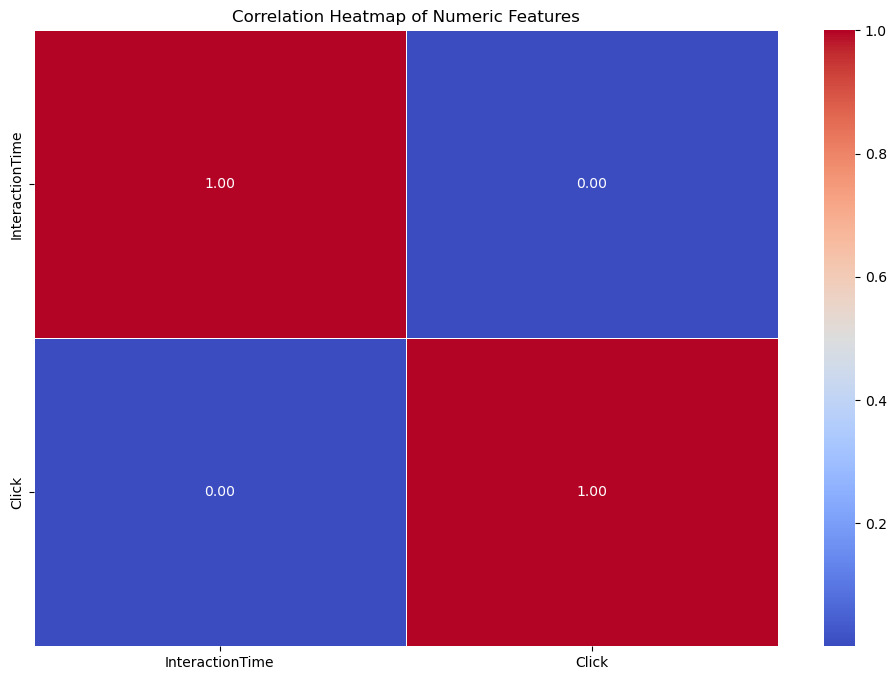

In [26]:
import seaborn as sns

# Filter out the numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

###  Analyze category features

In [27]:
# Filter non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number','datetime']).columns
non_numeric_columns

Index(['Action', 'Website', 'BannerSize', 'Brand', 'colour', 'ActionHour',
       'ActionMonth', 'ActionYear'],
      dtype='object')

In [47]:
df['Action'].value_counts() #df.groupby('Action').value_counts().sort_values(ascending=False)

View     999756
Click       244
Name: Action, dtype: int64

## The dataset is extremely imbalanced. Seems VERY difficult to build an efficient predicting model with 244 records over 1m actions
## oversample the Click records will get high precion on training data but may overfitting
## Consider downsize the majority first then oversampling the Click records 

In [32]:
df['Click'].sum()

244

In [36]:
df[df['Click'] == 1]

ActionTime Action        Website BannerSize     Brand  \
812    2017-12-26 04:09:13.516880  Click         Kijiji    160x600  JoeFresh   
1117   2017-10-06 23:59:21.698311  Click         Amazon    160x600  Old Navy   
4639   2017-12-16 15:56:47.056947  Click       Facebook    300x250    Disney   
15419  2017-12-31 05:28:57.893072  Click       Facebook    160x600  Carter's   
24752  2018-01-09 20:29:53.236156  Click       Facebook    300x250  JoeFresh   
...                           ...    ...            ...        ...       ...   
366745 2017-12-29 19:27:45.651540  Click       Facebook     300x50      Zara   
367417 2017-08-09 15:14:57.425839  Click       Facebook    160x600    Disney   
368297 2017-11-09 03:51:57.292799  Click       Facebook    300x250       Gap   
374358 2017-09-25 16:49:41.152870  Click  instagram.com    300x250  Old Navy   
381066 2017-10-20 21:08:37.188878  Click       Facebook    300x600  JoeFresh   

        colour  InteractionTime ActionHour ActionMonth ActionYear  Click  
812      other         0.998667          4          12       2017      1  
1117    Yellow         0.024737         23          10       2017      1  
4639      Pink         0.474729         15          12       2017      1  
15419   Yellow         2.190019          5          12       2017      1  
24752     Pink         0.789268         20           1       2018      1  
...        ...              ...        ...         ...        ...    ...  
366745  Yellow         1.317718         19          12       2017      1  
367417  Yellow         0.702667         15           8       2017      1  
368297    Pink         1.919004          3          11       2017      1  
374358    Pink         2.170710         16           9       2017      1  
381066    Blue         1.082936         21          10       2017      1  

[100 rows x 11 columns]

In [41]:
# df['Website'].value_counts() #df.groupby('Action')['Website'].mean().sort_values(ascending=False)
pd.crosstab(df['Website'], df['Action'])

Action         Click    View
Website                     
AOL                0     560
Amazon             6   20595
Atedra             2   61635
Craigslist.ca      1   39673
Expedia            6    6986
Facebook         165  599972
Kijiji             7    7719
Other             32   97584
Sympatico          1   11352
TubeMogul          9   28542
Twitter            0   21086
Wayfair            1    4001
Weather            0    5116
Yahoo              6   33725
Youtube            0    5150
instagram.com      8   56060

In [45]:
# df['BannerSize'].value_counts()
pd.crosstab(df['BannerSize'], df['Action'])

Action      Click    View
BannerSize               
1200x627        5   32901
1536x2048       0     319
160x600        36   57522
1x1            16    8641
300x250        80  408625
300x50          4    1818
300x600        11   59269
320x100         0    1272
320x480         0    7114
320x50         12   62151
728x90         48  196171
750x125         1     571
768x1024        0    1167
Other          31  162215

In [46]:
pd.crosstab(df['Brand'], df['Action'])

Action                Click    View
Brand                              
Banana Republic          12   84099
Burberry                 21   83325
Carter's                 59  222576
Disney                   13   83192
Gap                      11   30685
JoeFresh                 42  191680
Old Navy                 39  150544
The Children's Place      8   27981
Zara                     16   55563
gymboree                 23   70111

In [48]:
pd.crosstab(df['colour'], df['Action'])

Action  Click    View
colour               
Blue       32  137824
Gold       40  161287
Pink       79  322758
Red        22   92359
White      10   55459
Yellow     48  184084
other      13   45985

In [37]:
df['BannerSize'] = df['BannerSize'].replace('other', 'Other')

In [102]:
pd.crosstab(df['ActionHour'], df['Action'])

Action      Click   View
ActionHour              
0               6  56403
1              10  51028
2              10  42935
3               8  38189
4               4  45466
5               5  43360
6               1  26948
7               8  18256
8               2  13510
9               1  13785
10              1  18343
11              4  26669
12             11  35134
13              8  42806
14             14  49479
15             21  49319
16             18  51094
17             15  50839
18             17  52092
19             23  54388
20             14  54631
21             21  56029
22              3  54512
23             19  54541

In [103]:
pd.crosstab(df['ActionMonth'], df['Action'])

Action       Click    View
ActionMonth               
1               61  131022
7                5   35480
8               23  144426
9               22  225852
10              41  270357
11              39  102499
12              53   90120

In [104]:
pd.crosstab(df['DayofWeek'], df['Action'])

Action     Click    View
DayofWeek               
Friday        43  142644
Monday        43  153221
Saturday      25  130921
Sunday        13  133923
Thursday      38  141729
Tuesday       52  153428
Wednesday     30  143890

## Split Train and Test data set

In [166]:
#Intialize X and y
X = df.drop(['Action','ActionTime','Click'], axis=1)  # DataFrame without the 'Churn' column

# Extract the 'Churn' column as the dependent variable (y)
y = df['Action']

In [167]:
X

Website BannerSize     Brand  colour  InteractionTime  \
0            Facebook    300x600  Carter's    Pink         0.171601   
1            Facebook    300x250  Burberry     Red         4.303945   
2            Facebook     728x90    Disney  Yellow         0.868106   
3            Facebook     320x50  Carter's  Yellow         0.802647   
4       instagram.com    300x250       Gap    Gold         0.627148   
...               ...        ...       ...     ...              ...   
999995  instagram.com    300x250  Old Navy  Yellow         0.049011   
999996        Twitter    320x480  JoeFresh  Yellow         0.059118   
999997          Other    300x250  JoeFresh    Pink         0.025754   
999998       Facebook    300x250  Old Navy    Pink         0.453710   
999999         Amazon      Other  Old Navy    Pink         2.411266   

       ActionHour ActionMonth ActionYear  DayofWeek  
0              12          10       2017     Monday  
1               1           8       2017  Wednesday  
2               2          12       2017     Monday  
3              19           1       2018    Tuesday  
4               2          10       2017     Monday  
...           ...         ...        ...        ...  
999995         22          10       2017     Sunday  
999996          2           1       2018  Wednesday  
999997          0           8       2017  Wednesday  
999998         15           1       2018   Saturday  
999999         21           9       2017    Tuesday  

[1000000 rows x 9 columns]

In [144]:
X.columns  

Index(['Website', 'BannerSize', 'Brand', 'colour', 'InteractionTime',
       'ActionHour', 'ActionMonth', 'ActionYear', 'DayofWeek'],
      dtype='object')

In [168]:
#all_numveric
numeric_columns =  X.select_dtypes(include='number' ).columns 
#all_category 
non_numeric_columns = X.select_dtypes(exclude='number').columns 

In [95]:
# Split the data into training and test sets (e.g., 70% train and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [169]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_test.shape)

X_train shape:  (700000, 83)
X_test shape:  (300000, 83)
y_train shape:  (700000,)
y_train shape:  (300000,)


### Build Pipeline DT: 
#### 1, preprocessing, 2 One-Hot-Encoding 3, Standscaling 4, RandomSampling 5, DecisionTree Algo

In [97]:
from sklearn.pipeline import Pipeline as Pipe # distinguish from imblearn pipeline
from imblearn.pipeline import Pipeline



steps = [('imp', SimpleImputer(strategy='mean')),
         ('ohe', OneHotEncoder(handle_unknown='ignore')), 
         ('scaler', StandardScaler(with_mean=False)), 
         ('ros', RandomOverSampler()),
         ('dt', DecisionTreeClassifier())]

pipeline = Pipeline(steps=steps)

In [98]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imp', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore')),
                ('scaler', StandardScaler(with_mean=False)),
                ('ros', RandomOverSampler()),
                ('dt', DecisionTreeClassifier())])

In [99]:
y_pred = pipeline.predict(X_test)

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Click       0.00      0.02      0.00        83
        View       1.00      1.00      1.00    299917

    accuracy                           1.00    300000
   macro avg       0.50      0.51      0.50    300000
weighted avg       1.00      1.00      1.00    300000



In [101]:
confusion_matrix(y_test, y_pred)

array([[     2,     81],
       [  1119, 298798]], dtype=int64)

In [135]:
# decision tree regressor allows us to see 'the feature importances'

pd.Series(pipeline.feature_importances_, index=X.columns).sort_values().plot(kind='bar');

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [110]:
print('X_train shape: ', X_train.shape)  #oversampling??? where to check

X_train shape:  (700000, 9)


### No Pipeline use DT: 
#### 1, One-Hot-Encoding  2, RandomSampling 3, DecisionTree Algo

In [170]:
X.columns

Index(['Website', 'BannerSize', 'Brand', 'colour', 'InteractionTime',
       'ActionHour', 'ActionMonth', 'ActionYear', 'DayofWeek'],
      dtype='object')

In [171]:
X = X.drop(['ActionHour','ActionYear'], axis=1)

In [172]:
X = pd.get_dummies(X, drop_first=True)

In [173]:
X.shape

(1000000, 56)

In [174]:
X

InteractionTime  Website_Amazon  Website_Atedra  \
0              0.171601               0               0   
1              4.303945               0               0   
2              0.868106               0               0   
3              0.802647               0               0   
4              0.627148               0               0   
...                 ...             ...             ...   
999995         0.049011               0               0   
999996         0.059118               0               0   
999997         0.025754               0               0   
999998         0.453710               0               0   
999999         2.411266               1               0   

        Website_Craigslist.ca  Website_Expedia  Website_Facebook  \
0                           0                0                 1   
1                           0                0                 1   
2                           0                0                 1   
3                           0                0                 1   
4                           0                0                 0   
...                       ...              ...               ...   
999995                      0                0                 0   
999996                      0                0                 0   
999997                      0                0                 0   
999998                      0                0                 1   
999999                      0                0                 0   

        Website_Kijiji  Website_Other  Website_Sympatico  Website_TubeMogul  \
0                    0              0                  0                  0   
1                    0              0                  0                  0   
2                    0              0                  0                  0   
3                    0              0                  0                  0   
4                    0              0                  0                  0   
...                ...            ...                ...                ...   
999995               0              0                  0                  0   
999996               0              0                  0                  0   
999997               0              1                  0                  0   
999998               0              0                  0                  0   
999999               0              0                  0                  0   

        ...  ActionMonth_9  ActionMonth_10  ActionMonth_11  ActionMonth_12  \
0       ...              0               1               0               0   
1       ...              0               0               0               0   
2       ...              0               0               0               1   
3       ...              0               0               0               0   
4       ...              0               1               0               0   
...     ...            ...             ...             ...             ...   
999995  ...              0               1               0               0   
999996  ...              0               0               0               0   
999997  ...              0               0               0               0   
999998  ...              0               0               0               0   
999999  ...              1               0               0               0   

        DayofWeek_Monday  DayofWeek_Saturday  DayofWeek_Sunday  \
0                      1                   0                 0   
1                      0                   0                 0   
2                      1                   0                 0   
3                      0                   0                 0   
4                      1                   0                 0   
...                  ...                 ...               ...   
999995                 0                   0                 1   
999996                 0                   0                 0   
99

In [175]:
# Split the data into training and test sets (e.g., 70% train and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [176]:
#SMOTE oversampling

ros = RandomOverSampler()
#ros = RandomUnderSampler()

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

## Final Model 
### Discion Tree Classifier
### oversampling + feature selction 7 features ['Website', 'BannerSize', 'Brand', 'colour', 'InteractionTime', 'ActionMonth', 'DayofWeek']

In [177]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
#model = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=42, )
model.fit(X_train_resampled, y_train_resampled)
#model.fit(X_train, y_train)
y_pred_train = model.predict(X_train_resampled)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
# X_train_resampled_drop

              precision    recall  f1-score   support

       Click       0.00      0.27      0.00        83
        View       1.00      0.89      0.94    299917

    accuracy                           0.89    300000
   macro avg       0.50      0.58      0.47    300000
weighted avg       1.00      0.89      0.94    300000



In [178]:
confusion_matrix(y_test, y_pred)

array([[    22,     61],
       [ 33668, 266249]], dtype=int64)

<Axes: >

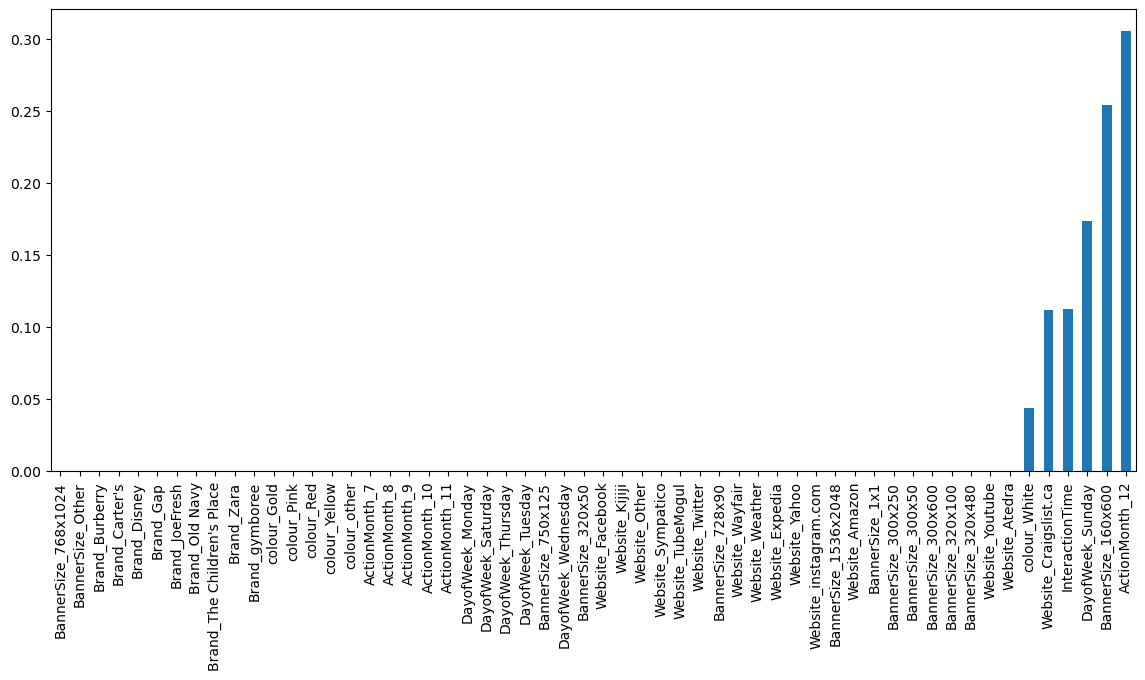

In [184]:
# decision tree regressor allows us to see 'the feature importances'
plt.figure(figsize=(14, 6)) 
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='bar')

In [202]:
model = LogisticRegression()
#model = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=42, )
model.fit(X_train_resampled, y_train_resampled)
#model.fit(X_train, y_train)
y_pred_train = model.predict(X_train_resampled)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
# X_train_resampled_drop

              precision    recall  f1-score   support

       Click       0.00      0.65      0.00        83
        View       1.00      0.68      0.81    299917

    accuracy                           0.68    300000
   macro avg       0.50      0.67      0.41    300000
weighted avg       1.00      0.68      0.81    300000



In [203]:
confusion_matrix(y_test, y_pred)

array([[    54,     29],
       [ 95298, 204619]], dtype=int64)

### Build Pipeline LR: 
#### 1, preprocessing, 2 One-Hot-Encoding 3, Standscaling 4, RandomSampling 5, LogisticRegression Algo

In [105]:
steps = [('imp', SimpleImputer(strategy='most_frequent')),
         ('ohe', OneHotEncoder(handle_unknown='ignore')), 
         ('scaler', StandardScaler(with_mean=False)), 
         ('ros', RandomOverSampler()),
         ('lr', LogisticRegression())]


In [106]:
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imp', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore')),
                ('scaler', StandardScaler(with_mean=False)),
                ('ros', RandomOverSampler()), ('lr', LogisticRegression())])

In [107]:
y_pred = pipeline.predict(X_test)

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Click       0.50      0.01      0.02        83
        View       1.00      1.00      1.00    299917

    accuracy                           1.00    300000
   macro avg       0.75      0.51      0.51    300000
weighted avg       1.00      1.00      1.00    300000



In [109]:
confusion_matrix(y_test, y_pred)

array([[     1,     82],
       [     1, 299916]], dtype=int64)

### Final Pipeline use DT: 
####  1, column_transformer: a) drop_columns, b) imput mean for empty numeric colums c) One-Hot-Encoding d) Standscaling 
####  2, RandomSampling 
####  3, DecisionTree Algo

In [118]:
drop_features = ['ActionHour', 'ActionYear'] #,'Website', 'BannerSize', 'Brand', 'colour', 'InteractionTime',  'ActionMonth',  'DayofWeek']

transformers = [('drop_columns', 'drop', drop_features),
                ('imp', SimpleImputer(strategy='mean')),
                ('ohe', OneHotEncoder(handle_unknown='ignore')), 
                ('scaler', StandardScaler(with_mean=False))]
col_transformer = ColumnTransformer(transformers=transformers, remainder='drop')

In [120]:
drop_features = ['ActionHour', 'ActionYear'] #,'Website', 'BannerSize', 'Brand', 'colour', 'InteractionTime',  'ActionMonth',  'DayofWeek']

drop_transformer = ColumnTransformer(transformers=[('drop_columns', 'drop', drop_features)], remainder='passthrough')

In [121]:
drop_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop_columns', 'drop',
                                 ['ActionHour', 'ActionYear'])])

In [122]:
drop_transformer.transformers

[('drop_columns', 'drop', ['ActionHour', 'ActionYear'])]

In [123]:
steps = [('drop_columns', drop_transformer)]
pipeline = Pipeline(steps=steps)

In [126]:
pipeline

Pipeline(steps=[('drop_columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['ActionHour',
                                                   'ActionYear'])]))])

In [185]:
X_train

InteractionTime  Website_Amazon  Website_Atedra  \
506532         0.467542               0               0   
327991         1.582924               0               0   
715937         0.981884               0               0   
860726         0.311562               0               0   
78617          2.003839               0               0   
...                 ...             ...             ...   
259178         0.525738               0               0   
365838         0.487252               0               0   
131932         0.006866               0               0   
671155         1.329985               0               0   
121958         1.018146               0               0   

        Website_Craigslist.ca  Website_Expedia  Website_Facebook  \
506532                      0                0                 0   
327991                      0                0                 1   
715937                      0                0                 0   
860726                      0                0                 1   
78617                       0                0                 1   
...                       ...              ...               ...   
259178                      0                0                 0   
365838                      0                0                 1   
131932                      0                0                 1   
671155                      0                0                 1   
121958                      0                0                 0   

        Website_Kijiji  Website_Other  Website_Sympatico  Website_TubeMogul  \
506532               0              1                  0                  0   
327991               0              0                  0                  0   
715937               0              0                  0                  0   
860726               0              0                  0                  0   
78617                0              0                  0                  0   
...                ...            ...                ...                ...   
259178               0              0                  0                  0   
365838               0              0                  0                  0   
131932               0              0                  0                  0   
671155               0              0                  0                  0   
121958               0              1                  0                  0   

        ...  ActionMonth_9  ActionMonth_10  ActionMonth_11  ActionMonth_12  \
506532  ...              0               1               0               0   
327991  ...              1               0               0               0   
715937  ...              0               0               0               1   
860726  ...              0               1               0               0   
78617   ...              0               0               0               0   
...     ...            ...             ...             ...             ...   
259178  ...              0               1               0               0   
365838  ...              0               1               0               0   
131932  ...              1               0               0               0   
671155  ...              0               1               0               0   
121958  ...              0               1               0               0   

        DayofWeek_Monday  DayofWeek_Saturday  DayofWeek_Sunday  \
506532                 0                   0                 0   
327991                 0                   0                 0   
715937                 0                   1                 0   
860726                 0                   0                 0   
78617                  0                   0                 0   
...                  ...                 ...               ...   
259178                 1                   0                 0   
365838                 1                   0                 0   
13

In [196]:
transformed_train = pipeline.transform(X_train)

In [199]:
fit_col_trans = col_transformer.fit(X_train)

In [200]:
X_train_trans = fit_col_trans.transform(X_train)

In [201]:
X_train_trans.shape

## Model Interpretion

In [189]:
y_test.value_counts()

View     299917
Click        83
Name: Action, dtype: int64

In [190]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train.columns.values,
                                 class_names=['View', 'Click'])


# Black box models (SVM, RandomForest, Boosting, Stacking)
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier((50, 50), random_state=1)

nn.fit(X_train, y_train)

# nn.score(X_test, y_test)

# Get predicted probabilities
y_proba = nn.predict_proba(X_train)[:, 1]


In [191]:
row_number =162     

# Explain the prediction for row 261
explanation = explainer.explain_instance(X_test.loc[row_number], nn.predict_proba)

explanation.show_in_notebook()

In [194]:
row_number =12     

# Explain the prediction for row 261
explanation = explainer.explain_instance(X_test.loc[row_number], nn.predict_proba)

explanation.show_in_notebook()

In [195]:
## over X_Train_resampled and yTrain_resampled data
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train_resampled.columns.values,
                                 class_names=['View', 'Click'])


# Black box models (SVM, RandomForest, Boosting, Stacking)
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier((50, 50), random_state=1)

nn.fit(X_train_resampled, y_train_resampled)

# nn.score(X_test, y_test)

# Get predicted probabilities
y_proba = nn.predict_proba(X_train_resampled)[:, 1]


In [197]:
## over X_Train_resampled and yTrain_resampled data
row_number =162     

# Explain the prediction for row 261
explanation = explainer.explain_instance(X_test.loc[row_number], nn.predict_proba)

explanation.show_in_notebook()

In [198]:
## over X_Train_resampled and yTrain_resampled data
row_number =12     

# Explain the prediction for row 261
explanation = explainer.explain_instance(X_test.loc[row_number], nn.predict_proba)

explanation.show_in_notebook()

## Insights, Conclusion and Next Step

### Insights

#### 1, Extremly Imbalanced data set with 1000000 actions but only 244 clicks 
#### 2, Too small Click dataset for training and testing, considering cross-validation 
#### 3, Many features can be created and contribute to the prediction, from TransactionTime 
#### 4, Model Intrepretion shows too small value of each column importance, may need change metrics and reduce more features  

### Conclusion


### Next Step
#### The Classification problem may consider Chi-test for feature selection, Xgboost for CV, and try more alogrithms and parameter tuning 


In [74]:
# Calculate total number of loans
total_loans = len(df)

# Calculate numC
loan_status_percentage = df['Dlq_stat'].value_counts(normalize=True) * 100

# Calculate sum of amount grouped by loan status
total_loan_amount_by_status = df.groupby('Dlq_stat')['amounts'].sum()

# Create separate DataFrames for delinquency records and non-delinquency records
#df_delinquency = df[df['Dlq_stat'].isin(['Delinquent', 'WriteOff'])]
df_delinquency = df[df['Dlq_stat'].isin(['Delinquent'])]

# Calculate delinquency rate for each loan type
delinquency_by_loan_type = df_delinquency.groupby('Vertical1').size() / len(df_delinquency) * 100

# Calculate sum of amount for delinquency records grouped by loan type
delinquency_amount_by_loan_type = df_delinquency.groupby('Vertical1')['amounts'].sum()

# Calculate delinquency rate for each Province type
delinquency_by_province = df_delinquency.groupby('Province1').size() / len(df_delinquency) * 100

# Calculate sum of amount for delinquency records grouped by Province type
delinquency_amount_by_province = df_delinquency.groupby('Province1')['amounts'].sum()

# Create a new column 'Dlq_days_cat' based on 'Dlq_days' values
df['Dlq_days_cat'] = pd.cut(df['Dlq_days'], bins=[-1, 7, 30, 90, float('inf')],
                            labels=['less_week', 'less_month', 'less_quarter', 'greater_quarter'])

# Calculate sum of amount for delinquency records grouped by Delinquency Days Category type
delinquency_amount_by_days_cat = df[df['Dlq_stat'].isin(['Delinquent', 'WriteOff'])].groupby('Dlq_days_cat')['amounts'].sum()

# Create the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div(children=[
    html.H1("Loan Dashboard"),

    # Overview Panel
    html.Div(children=[
        html.H3("Overview Panel"),
        html.Div(f"Total number of loans: {total_loans}"),
        html.Div([
            html.Div(f"Loan Status: {loan_status_distribution.index[i]}, "
                     f"Number: {loan_status_distribution.values[i]}, "
                     f"Percentage: {loan_status_percentage.values[i]:.2f}%")
            for i in range(len(loan_status_distribution))
        ]),
    ]),
 

    # Loan Status Breakdown
    html.Div(children=[
        html.H3("Loan Status Breakdown"),
        dcc.Graph(figure=px.pie(labels=loan_status_distribution.index, values=loan_status_distribution.values,
                                 title="Loan Status Breakdown"))
    ]),

    # Loan Amount Breakdown
    html.Div(children=[
        html.H3("Loan amount Breakdown"),
        dcc.Graph(figure=px.pie(labels=total_loan_amount_by_status.index, values=total_loan_amount_by_status.values,
                                 title="Total Loan Amounts by Status"))
    ]),

    # Delinquency number by Loan Type
    html.Div(children=[
        html.H3("Delinquency Number by Loan Type"),
        dcc.Graph(figure=px.bar(x=delinquency_by_loan_type.index, y=delinquency_by_loan_type.values,
                                title="Delinquency Rate by Loan Type"))
    ]),

    # Delinquency Loan Amount Chart by Loan Type
    html.Div(children=[
        html.H3("Delinquency Loan Amount Chart by Loan Type"),
        dcc.Graph(figure=px.bar(x=delinquency_amount_by_loan_type.index, y=delinquency_amount_by_loan_type.values,
                                title="Sum of Amount for Delinquency Records by Loan Type"))
    ]),

    # Delinquency number by Province Type
    html.Div(children=[
        html.H3("Delinquency Number by Province Type"),
        dcc.Graph(figure=px.pie(labels=delinquency_by_province.index, values=delinquency_by_province.values,
                                 title="Delinquency Rate by Province"))
    ]),

    # Delinquency Loan Amount Chart by Province Type
    html.Div(children=[
        html.H3("Delinquency Loan Amount Chart by Province Type"),
        dcc.Graph(figure=px.bar(x=delinquency_amount_by_province.index, y=delinquency_amount_by_province.values,
                                title="Sum of Amount for Delinquency Records by Province Type"))
    ]),

    # Delinquency Loan Amount Chart by Delinquency Days Category Type
    html.Div(children=[
        html.H3("Delinquency Loan Amount Chart by Delinquency Days Category Type"),
        dcc.Graph(figure=px.bar(x=delinquency_amount_by_days_cat.index, y=delinquency_amount_by_days_cat.values,
                                title="Sum of Amount for Delinquency Records by Delinquency Days Category"))
    ])
])

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True, port=8088)

C:\Users\vivian\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\vivian\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\vivian\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [147]:
#!pip install pandas plotly dash